# Health Tracking System
## Análisis de Regresión

## Optimización Convexa - Mayo 2022

***Ashwin Bhat***

***Carlos Caloca Gomez***

***Daniel Lagunas Barba***

***Leonardo Razo Islas***

***Antonio Sepúveda Angulo***



**Introducción**

Los productores de carne de pollo tienen como objetivo, de manera muy general, convertir de manera más eficiente los granos que consumen sus aves en carne. Existen muchas métricas y variables que se evalúan durante el crecimiento del pollo como: 
-	Conversión alimenticia
-	Ganancia de peso diario
-	Mortandad
-	Mortalidad
-	Integridad Intestinal
-	Integridad Respiratoria
-	Incidencia de enfermades
-	Peso final

Todas ellas estas relacionadas entre sí y son utilizadas para verificar como crecen las parvadas y cual es la rentabilidad del negocio. La métrica de Integridad Intestinal es utilizada de manera subclínica para indicar cual es la calidad con la cual el pollo está procesando el alimento y si presenta alguna lesión interna que nos ayuda a identificar problemas de nutrición, bioseguridad y salud. Para obtener está métrica se requiere hacer un muestreo de al menos 5 aves por edad por caseta por parvada y realizar una necropsia detallada donde se revisan alrededor de 60 partes de órganos del ave, ingresarlas a un software llamado HTS y te dará 2 resultados: Integridad Intestinal e Integridad Respiratoria.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [ ]:
df_db_1435 = pd.read_excel('db_1419_all.xlsx',sheet_name='Sheet1')

In [ ]:
# Se imprime los primeros 5 registro de la tabla 

df_db_1435.head(5)

,Aflt,Customer,PostingMonth,PostingYear,Age,AgePhase,Breed,Bird,a,AB,...,SX,TDS,TH,THY,TK,TN,TRA,TW,WC,I2
0,MX,716.0,November,2016.0,14.0,2.0,Arbor Acres,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0
1,MX,716.0,November,2016.0,14.0,2.0,Arbor Acres,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2,MX,716.0,November,2016.0,14.0,2.0,Arbor Acres,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
3,MX,716.0,November,2016.0,14.0,2.0,Arbor Acres,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0
4,MX,716.0,November,2016.0,14.0,2.0,Arbor Acres,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [ ]:
# Columnas

df_db_1435.columns

Index(['Aflt', 'Customer', 'PostingMonth', 'PostingYear', 'Age', 'AgePhase',
       'Breed', 'Bird', 'a', 'AB', 'AC', 'AP', 'Ars', 'b', 'BDM', 'BF', 'BL',
       'BOW', 'BOX', 'BSM', 'BTL', 'Bur', 'BUW', 'CCS', 'Cdv', 'CFM', 'CL',
       'Clr', 'CM', 'CS', 'DC', 'FH', 'FP', 'gAC', 'gBR', 'Giz', 'gMI', 'gMx',
       'gNX', 'gTN', 'GUL', 'GUW', 'HK', 'HY', 'IH', 'IP', 'IT', 'L', 'LE',
       'MC', 'ML', 'mMX', 'NE', 'OM', 'PL', 'PRV', 'RI', 'RKT', 'RW', 'RY',
       'SC', 'SH', 'SPW', 'SX', 'TDS', 'TH', 'THY', 'TK', 'TN', 'TRA', 'TW',
       'WC', 'I2'],
      dtype='object')

In [ ]:
# Remover las columnas de integridad respratoria, para dejar exclusivamente las lesiones de Integridad Intestinal

df_db_1435.drop(['Ars','AP','TRA','RI'],axis=1,inplace=True)

In [ ]:
'''
Ignoring first 8 columns as they are categorical parameters and output column I2 
'''
x_columns = [col for col in df_db_1435.columns if col not in ['Aflt', 'Customer', 'PostingMonth', 'PostingYear', 'Age', 'AgePhase',
       'Breed','Bird','I2', 'I2_scaled']]
x_columns
df_db_1435[x_columns]

,BL,CS,FP,gAC,Giz,gMI,gMx,gTN,HY,IH,IT,MC,ML,NE,PRV,TH,TK,TW,WC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28715,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28716,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
28718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Se revisan los tipos de datos, solo para verificar que no estuvieran como strings

df_db_1435.dtypes

Aflt             object
Customer        float64
PostingMonth     object
PostingYear     float64
Age             float64
                 ...   
TK              float64
TN              float64
TW              float64
WC              float64
I2              float64
Length: 69, dtype: object

In [ ]:
# Se hace el objeto para entrenar el modelo de regresion multlinear y el split de test y train

lr_multple=linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(df_db_1435[x_columns],df_db_1435['I2'],test_size=0.2)

lr_multple.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Se genera la prediccion 

y_predict=lr_multple.predict(x_test)

In [ ]:
print('valor de los coeficientes')
print(lr_multple.coef_,'\n')

print('valor del intercepto')
print(lr_multple.intercept_,'\n')

print('score del entrenamiento')
print(lr_multple.score(x_train,y_train),'\n')

print('score del test')
print(lr_multple.score(x_test,y_test))

valor de los coeficientes
[-3.05218622e-14 -1.11509326e-12 -1.25413568e-13  6.88338275e-15
  9.76996262e-14 -4.21884749e-14 -1.00000000e+00 -4.44089210e-16
 -6.21724894e-15 -1.13242749e-14  1.30162547e-12 -3.01092484e-13
 -7.99360578e-15  9.99200722e-16 -2.25819363e-13  6.36468656e-12
  3.10862447e-15 -1.19904087e-14  4.88498131e-15 -3.00000000e+00
  2.41473508e-13 -4.54081217e-13 -2.00000000e+00 -3.00000000e+00
 -2.30371278e-15 -3.00000000e+00 -2.00000000e+00 -5.00000000e+00
 -3.99680289e-15 -2.00000000e+00  2.22044605e-15 -5.55111512e-16
 -6.50257626e-13 -5.00000000e+00 -1.00000000e+00 -3.24407168e-13
 -2.00000000e+00 -6.57196519e-13 -4.35207426e-14 -3.00000000e+00
 -2.00000000e+00  4.44089210e-15 -5.00000000e+01 -7.51509965e-13
  0.00000000e+00 -3.00000000e+00  6.43929354e-14  0.00000000e+00
 -1.16573418e-15  3.49942297e-13 -2.37143638e-13  0.00000000e+00
  1.69197989e-13  3.07531778e-13 -3.00000000e+00  2.81774604e-13
 -3.00000000e+00  5.37014877e-13 -1.00000000e+00 -2.00000000e+00

In [ ]:
# Valoracion con maximo daño

lr_multple.predict(np.array(df_db_1435[x_columns].max()).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-40.])

In [ ]:
# Valoracion con minimo daño , lo cual hace sentido porque todos los pollos inician con calificacion de 100

lr_multple.predict(np.array(df_db_1435[x_columns].min()).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([100.])

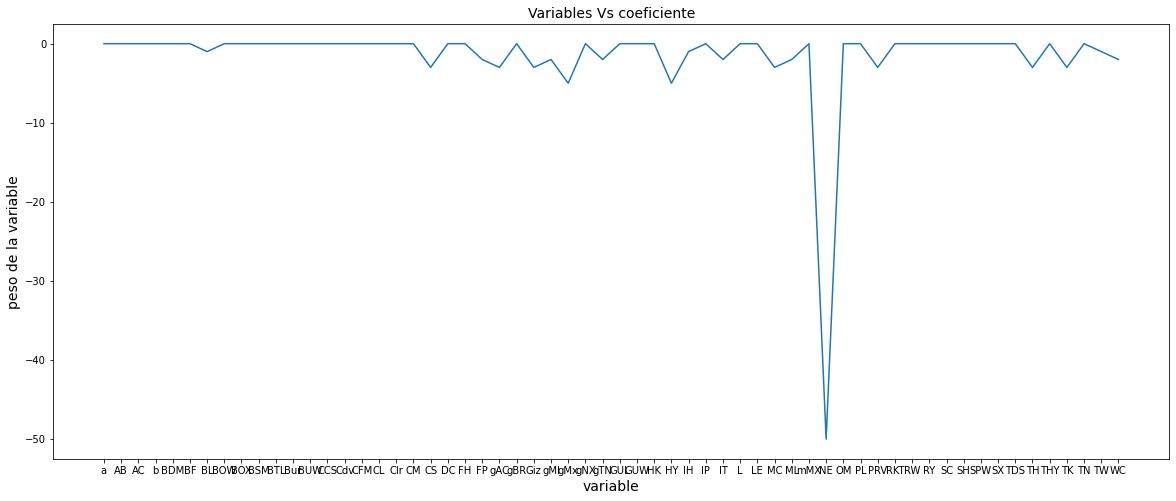

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(x_columns,lr_multple.coef_)
plt.title('Variables Vs coeficiente', fontsize=14)
plt.xlabel('variable', fontsize=14)
plt.ylabel('peso de la variable', fontsize=14)
#plt.grid(True)
plt.show()

In [ ]:
# Se buscan las variables con poco peso

col_name=np.array(df_db_1435[x_columns].columns.tolist())     
var_less_weight = col_name[abs(lr_multple.coef_)< 0.01]
var_less_weight

array(['a', 'AB', 'AC', 'b', 'BDM', 'BF', 'BOW', 'BOX', 'BSM', 'BTL',
       'Bur', 'BUW', 'CCS', 'Cdv', 'CFM', 'CL', 'Clr', 'CM', 'DC', 'FH',
       'gBR', 'gNX', 'GUL', 'GUW', 'HK', 'IP', 'L', 'LE', 'mMX', 'OM',
       'PL', 'RKT', 'RW', 'RY', 'SC', 'SH', 'SPW', 'SX', 'TDS', 'THY',
       'TN'], dtype='<U3')

In [ ]:
# Se remueven las variables con poco peso

df_db_1435.drop(var_less_weight,axis=1, inplace=True)

In [ ]:
# Se vuelve hacer el entrenamiento del modelo y el split test train

x_train_lr,x_test_lr,y_train_lr,y_test_lr = train_test_split(df_db_1435[x_columns],df_db_1435['I2'],test_size=0.2)

lr_multple.fit(x_train_lr,y_train_lr)

LinearRegression()

In [ ]:
print('valor de los coeficientes')
print(lr_multple.coef_,'\n')

print('valor del intercepto')
print(lr_multple.intercept_,'\n')

print('score del entrenamiento')
print(lr_multple.score(x_train_lr,y_train_lr),'\n')

print('score del test')
print(lr_multple.score(x_test_lr,y_test_lr))


y_pred_lr = lr_multple.predict(x_test_lr)
y_pred_all_lr = lr_multple.predict(df_db_1435[x_columns])
y_pred_all_lr, y_test_lr

valor de los coeficientes
[ -1.  -3.  -2.  -3.  -3.  -2.  -5.  -2.  -5.  -1.  -2.  -3.  -2. -50.
  -3.  -3.  -3.  -1.  -2.] 

valor del intercepto
100.0 

score del entrenamiento
1.0 

score del test
1.0


(array([ 94., 100., 100., ...,  94.,  96.,  80.]), 15291     95.0
 21876    100.0
 21831    100.0
 23649    100.0
 9295      82.0
          ...  
 11321    100.0
 515       97.0
 11591     92.0
 16657     98.0
 14315     92.0
 Name: I2, Length: 5744, dtype: float64)

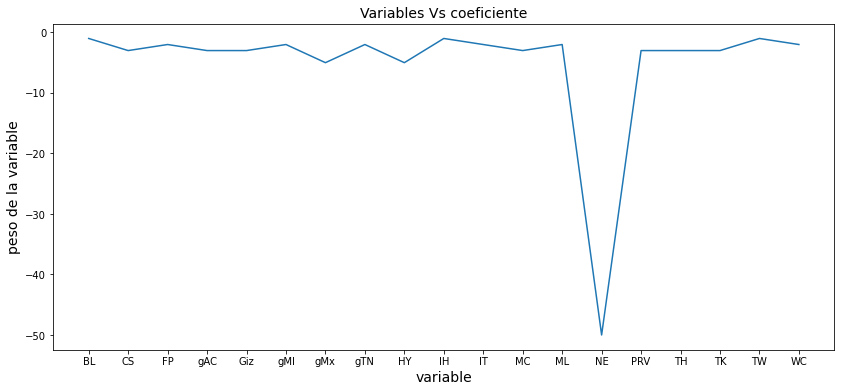

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(df_db_1435.columns[8:-1],lr_multple.coef_)
plt.title('Variables Vs coeficiente', fontsize=14)
plt.xlabel('variable', fontsize=14)
plt.ylabel('peso de la variable', fontsize=14)
#plt.grid(True)
plt.show()

In [ ]:
# Variables y Coeficientes

pd.DataFrame([df_db_1435[x_columns],np.around(lr_multple.coef_,2)])

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,BL CS FP gAC Giz gMI gMx gTN ...
1,"[-1.0, -3.0, -2.0, -3.0, -3.0, -2.0, -5.0, -2...."


In [ ]:
# Errores 0_1
# Porque si no tiene erores el I2 sale diferente a 100

df_db_1435[x_columns][ (df_db_1435[x_columns].sum(axis=1)==0) & (df_db_1435.I2 == 100) ]

,BL,CS,FP,gAC,Giz,gMI,gMx,gTN,HY,IH,IT,MC,ML,NE,PRV,TH,TK,TW,WC
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_db_1435[x_columns][ (df_db_1435[x_columns].sum(axis=1)==0) & (df_db_1435.I2 != 100) ]

,BL,CS,FP,gAC,Giz,gMI,gMx,gTN,HY,IH,IT,MC,ML,NE,PRV,TH,TK,TW,WC


### Lasso Regression

**Get the data from Excel and Store the values in the dataframe**

In [ ]:
df_db_1435 = pd.read_excel('db_1419_all.xlsx',sheet_name='Sheet1')

**Drop the unnecessary columns(Data Preprocessing)**

In [ ]:
df_db_1435.drop(['Ars','AP','TRA','RI'],axis=1,inplace=True)
df_db_1435.columns

Index(['Aflt', 'Customer', 'PostingMonth', 'PostingYear', 'Age', 'AgePhase',
       'Breed', 'Bird', 'a', 'AB', 'AC', 'b', 'BDM', 'BF', 'BL', 'BOW', 'BOX',
       'BSM', 'BTL', 'Bur', 'BUW', 'CCS', 'Cdv', 'CFM', 'CL', 'Clr', 'CM',
       'CS', 'DC', 'FH', 'FP', 'gAC', 'gBR', 'Giz', 'gMI', 'gMx', 'gNX', 'gTN',
       'GUL', 'GUW', 'HK', 'HY', 'IH', 'IP', 'IT', 'L', 'LE', 'MC', 'ML',
       'mMX', 'NE', 'OM', 'PL', 'PRV', 'RKT', 'RW', 'RY', 'SC', 'SH', 'SPW',
       'SX', 'TDS', 'TH', 'THY', 'TK', 'TN', 'TW', 'WC', 'I2'],
      dtype='object')

**Split the data into train and test data set in the ratio of 4:1**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_db_1435[x_columns],df_db_1435['I2'],test_size=0.2)

**Sklearn SVR Module**

```we are using SVR module with Linear Kernel with Hyperparameters C and Epsilon. The Hyperparameters helps in tuning of the model to give us best result. we used GridsearchCV against different C and epsilon values, however due to quantity of data, we were not getting the result in time. Hence we manually checked using different C and epsilon value and we got a R2 score of 0.996 for C=1.0 and epsilon=0.3 which states that it is a good model.```

In [ ]:
#param_grid = {'kernel': ['linear'], 'C':[1, 1.5, 2, 10],'epsilon':[0.2,0.5,0.3]}
svr = svm.SVR()
regr = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1.0, epsilon=0.3))
#regr = GridSearchCV(svr, param_grid)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("score:", regr.score(x_test, y_test))
regr.get_feature_names_out

score: 0.9967430042607238


<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.3, kernel='linear'))])>

**Regression Metrics**

```We calculate some of the Linear Regression Metrics like MAE, MSE and RMSE. The ideal values of these metrics would be 0 indicating that there is no error.We get Error $<$ 0.3 with $R^2$ score of 0.99 indicating that we have a good model.```

`MSE mean squared error which calculate the square of error and is given by below formula.`

$MSE = \frac{1}{n_{samples}}\sum_{i=0}^{i=n_{samples}-1}{({y_i -\bar{y_i}})^2}$

`MAE is robust to outliers as it calculates the median of errors and is given by below formula.`

$MAE = median(\mid{y_1 - \bar{y_1}}\mid,...,\mid{y_n - \bar{y_n}}\mid) $

`RMSE is Root mean squared error which calculate the root of square of error and is given by below formula.`

$RMSE = \frac{1}{n_{samples}}\sum_{i=0}^{i=n_{samples}-1}{\mid{y_i -\bar{y_i}}\mid}$

In [ ]:
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

RMSE: 0.2999377162295851
MAE : 0.29993763130720813
MSE : 0.08996263361701912
R2 score: 0.9967430042607238


**Lasso Regularisation**

```We are going to check the model using Lasso Regularisation with hyperparameter $alpha=0.001$. Lasso L1 Regularisation helps in reducing number of Regression coefficients for the columns that are not needed in model. we get a very good $R^2$ score for train and test using Lasso Regularisation.```

In [ ]:
reg = linear_model.Lasso(alpha=0.001)
reg.fit(x_train,y_train )

print(reg.coef_)
print(reg.intercept_)
print("Regression with Lasso Regularisation train score:",reg.score(x_train,y_train))
print("Regression with Lasso Regularisation test score:",reg.score(x_test,y_test))

[ -0.96354     -2.99677363  -1.98968987  -2.99540334  -2.99906479
  -0.          -4.99560248  -1.99752616  -4.99598677  -0.98499044
  -1.99194327  -2.99743629  -1.99849836 -45.41143901  -2.99732949
  -2.98069487  -2.98008219  -0.          -1.99302153]
99.98881789888269
Regression with Lasso Regularisation train score: 0.9998075356060433
Regression with Lasso Regularisation test score: 0.9999948814718326


**Removing all the useless columns**

``` we are able to reduce the number of parameters from 60 to 19 using L1 Regularisation and create a Regression Model from that.```

In [ ]:
col_index = [index for index,x in enumerate(reg.coef_) if x.round(3) != 0]
df_db_1435.columns[col_index]

Index(['Aflt', 'Customer', 'PostingMonth', 'PostingYear', 'Age', 'Breed',
       'Bird', 'a', 'AB', 'AC', 'b', 'BDM', 'BF', 'BL', 'BOW', 'BOX', 'BTL'],
      dtype='object')

**Lasso Regularised Model**

In [ ]:
model = ''
for i in col_index:
    model = model + str(round(reg.coef_[i],3)) + str(df_db_1435.columns[i]) + ' '

print()
print()
print("The model based on Lasso regularisation is given as:")    
print(model, ' + ' ,str(reg.intercept_))



The model based on Lasso regularisation is given as:
-0.964Aflt -2.997Customer -1.99PostingMonth -2.995PostingYear -2.999Age -4.996Breed -1.998Bird -4.996a -0.985AB -1.992AC -2.997b -1.998BDM -45.411BF -2.997BL -2.981BOW -2.98BOX -1.993BTL   +  99.98881789888269


**Calculating y_pred values using test data**

In [ ]:
y_pred = np.matmul(x_test.iloc[:,col_index], reg.coef_[col_index].reshape(len(col_index),1)) + \
                    reg.intercept_*np.ones((x_test.shape[0],1))

**Regression Metrics**

```we get RMSE as 0.0118 and MSE as 0.0001 which is very good using now only the useful columns we get from Lasso Regularization.```

In [ ]:
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

RMSE: 0.011890360825304288
MAE : 0.00902395473974784
MSE : 0.00014138068055593087
R2 score: 0.9999948814718326


**Elastic Net Regularization**

``` Elastic Net Regularization uses the benefits of both Ridge and Lasso. It helps to remove the parameters which have very high correlation or collinearity between them. Using Elastic Net we get $R^2$ score of 0.28 suggesting it is not a good model.```

[-0.         -0.45442346 -0.         -0.41140201 -1.04375109 -0.
 -0.15141059 -0.2117905  -0.62927032 -0.         -0.         -0.56938799
 -0.         -0.         -0.18915788 -0.         -0.          0.
 -0.        ]
94.88450928109161
Regression with Elastic Net Regularisation train score: 0.24271894243837255
Regression with Elastic Net Regularisation test score: 0.25062353487331634


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.544e+05, tolerance: 6.322e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


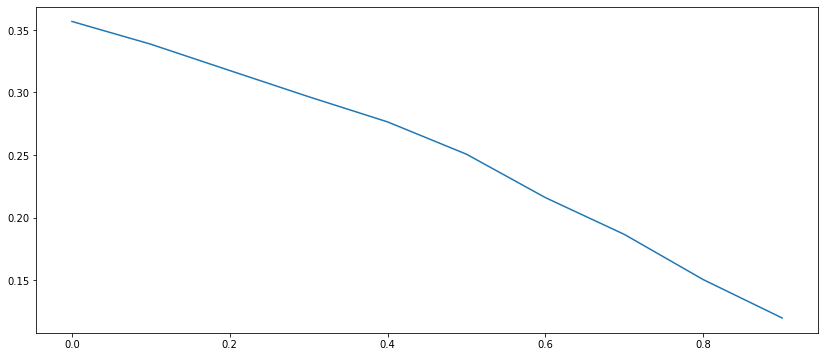

In [ ]:
reg = linear_model.ElasticNet(random_state=0)
reg.fit(x_train, y_train)

print(reg.coef_)
print(reg.intercept_)
print("Regression with Elastic Net Regularisation train score:",reg.score(x_train,y_train))
print("Regression with Elastic Net Regularisation test score:",reg.score(x_test,y_test))

score = []
for i in np.arange(0,1,0.1):
    reg = linear_model.ElasticNet(l1_ratio=i)
    reg.fit(x_train, y_train)
    score.append(reg.score(x_test, y_test))

plt.plot(np.arange(0,1,0.1), np.array(score))
plt.show()

In [ ]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 21 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=ca7512ff52605047874fe64fa3fef957e8b41b58364473f5b02962f47f5e4d22
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [ ]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpoqecr0ou
  JVM stdout: /tmp/tmpoqecr0ou/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpoqecr0ou/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_kvkvyu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Scaling by dividing by Maximum

` Here we are going the divide the I2 parameter by Maximum value (100) so that the range always remains within 0 and 1 `

In [ ]:
df_db_1435["I2_scaled"] = df_db_1435["I2"]/100

In [ ]:
glm_model = H2OGeneralizedLinearEstimator(family= "fractionalbinomial",lambda_ = 0,compute_p_values = True)

In [ ]:
predictors = ["BL","CS","FP","gAC","Giz","gMI","gMx","gTN","HY","IH","IT","MC","ML","NE","PRV","TH","TK","WC"]
response_col = "I2_scaled"


In [ ]:
frame = h2o.H2OFrame(df_db_1435)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
glm_model.train(predictors, response_col, training_frame= frame)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1652624799763_1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,fractionalbinomial,logit,None,18,18,5,Key_Frame__upload_82410ff9fa8c71fac8f16719a93d472a.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.6849618263609142
RMSE: 0.8276242060022859
LogLoss: 2.2694460301698482
Null degrees of freedom: 28719
Residual degrees of freedom: 28701
Null deviance: 1518.6805962298295
Residual deviance: 352.081429508268
AIC: 390.081429508268
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9800327917991121: 


,,0,1,Error,Rate
0,0,22663.0,0.0,0.0,(0.0/22663.0)
1,1,0.0,6057.0,0.0,(0.0/6057.0)
2,Total,22663.0,6057.0,0.0,(0.0/28720.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.980033,1.0,0.0
1,max f2,0.980033,1.0,0.0
2,max f0point5,0.980033,1.0,0.0
3,max accuracy,0.980033,1.0,0.0
4,max precision,0.980033,1.0,0.0
5,max recall,0.980033,1.0,0.0
6,max specificity,0.980033,1.0,0.0
7,max absolute_mcc,0.980033,1.0,0.0
8,max min_per_class_accuracy,0.980033,1.0,0.0
9,max mean_per_class_accuracy,0.980033,1.0,0.0



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-05-15 14:27:14,0.000 sec,0,759.340191,0.026439,,,,,,,
1,,2022-05-15 14:27:15,0.287 sec,1,382.402234,0.013315,,,,,,,
2,,2022-05-15 14:27:15,0.637 sec,2,360.377885,0.012548,,,,,,,
3,,2022-05-15 14:27:15,0.709 sec,3,177.822814,0.006192,,,,,,,
4,,2022-05-15 14:27:15,0.783 sec,4,176.041351,0.006130,,,,,,,
5,,2022-05-15 14:27:15,1.113 sec,5,176.040704,0.006130,0.827624,2.269446,-3.115857,1.0,1.0,NaN,0.0



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,HY,0.319311,1.000000,0.145871
1,Giz,0.269224,0.843139,0.122990
2,MC,0.205534,0.643679,0.093894
3,CS,0.194786,0.610019,0.088984
4,gMx,0.182332,0.571018,0.083295
5,gAC,0.159015,0.497993,0.072643
6,PRV,0.125496,0.393022,0.057331
7,gTN,0.110806,0.347015,0.050620
8,TH,0.100572,0.314967,0.045945
9,TK,0.099214,0.310712,0.045324


In [ ]:
# with scaled by dividing by 100

glm_model.model_performance()


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.6849618263609142
RMSE: 0.8276242060022859
LogLoss: 2.2694460301698482
Null degrees of freedom: 28719
Residual degrees of freedom: 28701
Null deviance: 1518.6805962298295
Residual deviance: 352.081429508268
AIC: 390.081429508268
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9800327917991121: 


,,0,1,Error,Rate
0,0,22663.0,0.0,0.0,(0.0/22663.0)
1,1,0.0,6057.0,0.0,(0.0/6057.0)
2,Total,22663.0,6057.0,0.0,(0.0/28720.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.980033,1.0,0.0
1,max f2,0.980033,1.0,0.0
2,max f0point5,0.980033,1.0,0.0
3,max accuracy,0.980033,1.0,0.0
4,max precision,0.980033,1.0,0.0
5,max recall,0.980033,1.0,0.0
6,max specificity,0.980033,1.0,0.0
7,max absolute_mcc,0.980033,1.0,0.0
8,max min_per_class_accuracy,0.980033,1.0,0.0
9,max mean_per_class_accuracy,0.980033,1.0,0.0


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


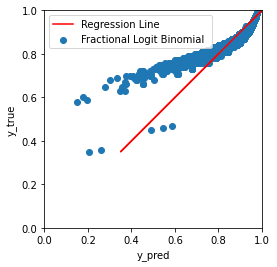

In [ ]:

#y_pred_s = glm_model.predict(h2o.H2OFrame(x_test_lr))
y_pred_s = glm_model.predict(h2o.H2OFrame(df_db_1435[x_columns]))

#y_test_fb = (y_test_lr - y_test_lr.min())/(y_test_lr.max()- y_test_lr.min())
#y_test_fb_s = y_test_lr/100

y_test_fb_s =df_db_1435.I2/100

fig, ax = plt.subplots(figsize=(4, 4))


#ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim([0,1])
ax.set_ylim([0,1])

#y_pred_lr_minmax = (y_pred_lr - y_pred_lr.min())/(y_pred_lr.max()-y_pred_lr.min())
#y_test_lr_minmax = (y_test_lr - y_test_lr.min())/(y_test_lr.max()-y_test_lr.min())
y_pred_lr_scaled = y_pred_all_lr/100
y_test_lr_scaled = y_test_lr/100

#plt.plot(y_pred_lr_minmax,y_test_lr_minmax, color='r', label='Regression Line')
plt.plot(y_pred_lr_scaled,y_test_fb_s, color='r', label='Regression Line')
plt.scatter(y_pred_s.as_data_frame(use_pandas=True, header=True)['p1'], y_test_fb_s, label="Fractional Logit Binomial ")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.legend()
plt.show()

## Min Max Scaling

` Here we are scaling I2 parameter based on MinMax in range of 0 and 1 by substracting by Minimum value and dividing by difference between Maximum and Minimum value.`

In [ ]:
predictors = ["BL","CS","FP","gAC","Giz","gMI","gMx","gTN","HY","IH","IT","MC","ML","NE","PRV","TH","TK","WC"]
response_col = "I2_scaled_minmax"

In [ ]:
df_db_1435["I2_scaled_minmax"] = (df_db_1435.I2- df_db_1435.I2.min())/(df_db_1435.I2.max()-df_db_1435.I2.min())

In [ ]:
frame = h2o.H2OFrame(df_db_1435)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
glm_model.train(predictors, response_col, training_frame= frame)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1652624799763_2


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,fractionalbinomial,logit,None,18,18,7,Key_Frame__upload_a907fa635b21c6897f6902a776a24cc8.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.6334999918108158
RMSE: 0.7959271271987253
LogLoss: 1.9316097588794827
Null degrees of freedom: 28719
Residual degrees of freedom: 28701
Null deviance: 2420.057093930928
Residual deviance: 508.1594353851076
AIC: 546.1594353851076
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9710112535417942: 


,,0,1,Error,Rate
0,0,22663.0,0.0,0.0,(0.0/22663.0)
1,1,0.0,6057.0,0.0,(0.0/6057.0)
2,Total,22663.0,6057.0,0.0,(0.0/28720.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.971011,1.0,0.0
1,max f2,0.971011,1.0,0.0
2,max f0point5,0.971011,1.0,0.0
3,max accuracy,0.971011,1.0,0.0
4,max precision,0.971011,1.0,0.0
5,max recall,0.971011,1.0,0.0
6,max specificity,0.971011,1.0,0.0
7,max absolute_mcc,0.971011,1.0,0.0
8,max min_per_class_accuracy,0.971011,1.0,0.0
9,max mean_per_class_accuracy,0.971011,1.0,0.0



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-05-15 14:28:18,0.000 sec,0,1210.028625,0.042132,,,,,,,
1,,2022-05-15 14:28:18,0.034 sec,1,472.854794,0.016464,,,,,,,
2,,2022-05-15 14:28:18,0.144 sec,2,445.058848,0.015496,,,,,,,
3,,2022-05-15 14:28:18,0.181 sec,3,255.238987,0.008887,,,,,,,
4,,2022-05-15 14:28:18,0.232 sec,4,254.204690,0.008851,,,,,,,
5,,2022-05-15 14:28:18,0.256 sec,5,254.080336,0.008847,,,,,,,
6,,2022-05-15 14:28:18,0.284 sec,6,254.079731,0.008847,,,,,,,
7,,2022-05-15 14:28:18,0.309 sec,7,254.079730,0.008847,0.795927,1.93161,-2.806629,1.0,1.0,NaN,0.0



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,HY,0.343153,1.000000,0.142808
1,Giz,0.292292,0.851783,0.121642
2,MC,0.221244,0.644738,0.092074
3,CS,0.208228,0.606808,0.086657
4,gMx,0.205503,0.598868,0.085523
5,gAC,0.176567,0.514544,0.073481
6,PRV,0.138651,0.404051,0.057702
7,gTN,0.120941,0.352440,0.050331
8,TH,0.109591,0.319365,0.045608
9,TK,0.109273,0.318439,0.045476


In [ ]:
glm_model.train(predictors, response_col, training_frame= frame)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1652624799763_3


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,fractionalbinomial,logit,None,18,18,7,Key_Frame__upload_a907fa635b21c6897f6902a776a24cc8.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.6334999918108158
RMSE: 0.7959271271987253
LogLoss: 1.9316097588794827
Null degrees of freedom: 28719
Residual degrees of freedom: 28701
Null deviance: 2420.057093930928
Residual deviance: 508.1594353851076
AIC: 546.1594353851076
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9710112535417942: 


,,0,1,Error,Rate
0,0,22663.0,0.0,0.0,(0.0/22663.0)
1,1,0.0,6057.0,0.0,(0.0/6057.0)
2,Total,22663.0,6057.0,0.0,(0.0/28720.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.971011,1.0,0.0
1,max f2,0.971011,1.0,0.0
2,max f0point5,0.971011,1.0,0.0
3,max accuracy,0.971011,1.0,0.0
4,max precision,0.971011,1.0,0.0
5,max recall,0.971011,1.0,0.0
6,max specificity,0.971011,1.0,0.0
7,max absolute_mcc,0.971011,1.0,0.0
8,max min_per_class_accuracy,0.971011,1.0,0.0
9,max mean_per_class_accuracy,0.971011,1.0,0.0



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-05-15 14:28:24,0.000 sec,0,1210.028625,0.042132,,,,,,,
1,,2022-05-15 14:28:25,0.051 sec,1,472.854794,0.016464,,,,,,,
2,,2022-05-15 14:28:25,0.115 sec,2,445.058848,0.015496,,,,,,,
3,,2022-05-15 14:28:25,0.139 sec,3,255.238987,0.008887,,,,,,,
4,,2022-05-15 14:28:25,0.180 sec,4,254.204690,0.008851,,,,,,,
5,,2022-05-15 14:28:25,0.210 sec,5,254.080336,0.008847,,,,,,,
6,,2022-05-15 14:28:25,0.239 sec,6,254.079731,0.008847,,,,,,,
7,,2022-05-15 14:28:25,0.274 sec,7,254.079730,0.008847,0.795927,1.93161,-2.806629,1.0,1.0,NaN,0.0



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,HY,0.343153,1.000000,0.142808
1,Giz,0.292292,0.851783,0.121642
2,MC,0.221244,0.644738,0.092074
3,CS,0.208228,0.606808,0.086657
4,gMx,0.205503,0.598868,0.085523
5,gAC,0.176567,0.514544,0.073481
6,PRV,0.138651,0.404051,0.057702
7,gTN,0.120941,0.352440,0.050331
8,TH,0.109591,0.319365,0.045608
9,TK,0.109273,0.318439,0.045476


In [ ]:
# with min-max scalar

glm_model.model_performance()


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.6334999918108158
RMSE: 0.7959271271987253
LogLoss: 1.9316097588794827
Null degrees of freedom: 28719
Residual degrees of freedom: 28701
Null deviance: 2420.057093930928
Residual deviance: 508.1594353851076
AIC: 546.1594353851076
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9710112535417942: 


,,0,1,Error,Rate
0,0,22663.0,0.0,0.0,(0.0/22663.0)
1,1,0.0,6057.0,0.0,(0.0/6057.0)
2,Total,22663.0,6057.0,0.0,(0.0/28720.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.971011,1.0,0.0
1,max f2,0.971011,1.0,0.0
2,max f0point5,0.971011,1.0,0.0
3,max accuracy,0.971011,1.0,0.0
4,max precision,0.971011,1.0,0.0
5,max recall,0.971011,1.0,0.0
6,max specificity,0.971011,1.0,0.0
7,max absolute_mcc,0.971011,1.0,0.0
8,max min_per_class_accuracy,0.971011,1.0,0.0
9,max mean_per_class_accuracy,0.971011,1.0,0.0


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


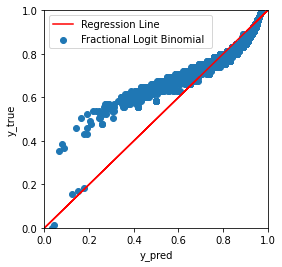

In [ ]:
y_pred_mm = glm_model.predict(h2o.H2OFrame(df_db_1435[x_columns]))


#y_test_fb_mm = (y_test_lr - y_test_lr.min())/(y_test_lr.max()- y_test_lr.min())
#y_test_fb_mm = (y_test_lr - df_db_1435.I2.min())/(df_db_1435.I2.max() - df_db_1435.I2.min())
y_fb_mm = (df_db_1435.I2 - df_db_1435.I2.min())/(df_db_1435.I2.max() - df_db_1435.I2.min())


fig, ax = plt.subplots(figsize=(4, 4))



#ax.plot([0,1], [0,1], 'k-', alpha=0.75, zorder=0)
#ax.set_aspect('equal')
#ax.set_xlim(lims)
#ax.set_ylim(lims)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

y_pred_lr_minmax = (y_pred_all_lr - y_pred_all_lr.min())/(y_pred_all_lr.max()-y_pred_all_lr.min())
y_test_lr_minmax = (y_test_lr - df_db_1435.I2.min())/(df_db_1435.I2.max()-df_db_1435.I2.min())


plt.scatter(y_pred_mm.as_data_frame(use_pandas=True, header=True)['p1'], y_fb_mm, label="Fractional Logit Binomial ")
plt.plot(y_pred_lr_minmax,y_fb_mm, color='r', label='Regression Line')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.legend()
plt.show()